# Course-End Project: Creating Cohorts of Songs


**Problem Scenario:** The customer always looks forward to specialized treatment, whether shopping over an e-commerce website or watching Netflix. They want what they might like to see. To keep the customers engaged, it is also crucial for companies to always present the most relevant information. Spotify is a Swedish audio streaming and media service provider. The company has over 456 million active monthly users, including over 195 million paying subscribers, as of September 2022. The company intends to create cohorts of different songs that will aid in the recommendation of songs to users based on various relevant features. Each cohort would contain similar types of songs.

**Problem Objective:**
As a data scientist, you should perform exploratory data analysis and perform cluster analysis to create cohorts of songs. The goal is to gain a better understanding of the various factors that contribute to creating a cohort of songs.


| Column Name       | Description                                                |
|-------------------|------------------------------------------------------------|
| Unnamed: 0        | An index column, likely representing the row number.       |
| name              | The name of the song.                                      |
| album             | The album the song belongs to.                             |
| release_date      | The release date of the song.                              |
| track_number      | The track number of the song within its album.             |
| id                | Identifier for the song.                                   |
| uri               | Uniform Resource Identifier for the song.                   |
| acousticness      | A measure of the acousticness of the song.                 |
| danceability      | A measure of how suitable a track is for dancing.          |
| energy            | A measure of the energy of the song.                       |
| instrumentalness  | A measure of the instrumentalness of the song.             |
| liveness          | A measure of the presence of a live audience in the recording. |
| loudness          | A measure of the loudness of the song.                     |
| speechiness       | A measure of the presence of spoken words in the song.     |
| tempo             | The tempo of the song in beats per minute (BPM).           |
| valence           | A measure of the musical positiveness of the song.          |
| popularity        | The popularity of the song.                                |
| duration_ms       | The duration of the song in milliseconds.                  |


## 1-Import Required Libraries:



In [292]:
from sklearn.cluster import KMeans

In [293]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


## 2-Load and Prepare Data

In [294]:
df = pd.read_csv("rolling_stones_spotify[1].csv")

In [295]:
df.isna().sum()

Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [296]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")


Number of duplicate rows: 0


In [297]:
# Drop the unnamed column
df.drop(columns=['Unnamed: 0'], inplace=True)

In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1610 non-null   object 
 1   album             1610 non-null   object 
 2   release_date      1610 non-null   object 
 3   track_number      1610 non-null   int64  
 4   id                1610 non-null   object 
 5   uri               1610 non-null   object 
 6   acousticness      1610 non-null   float64
 7   danceability      1610 non-null   float64
 8   energy            1610 non-null   float64
 9   instrumentalness  1610 non-null   float64
 10  liveness          1610 non-null   float64
 11  loudness          1610 non-null   float64
 12  speechiness       1610 non-null   float64
 13  tempo             1610 non-null   float64
 14  valence           1610 non-null   float64
 15  popularity        1610 non-null   int64  
 16  duration_ms       1610 non-null   int64  


## 3-Preprocess Numeric Columns:

In [299]:
df = df.drop(['id','uri','name','release_date','album'],axis=1)

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_number      1610 non-null   int64  
 1   acousticness      1610 non-null   float64
 2   danceability      1610 non-null   float64
 3   energy            1610 non-null   float64
 4   instrumentalness  1610 non-null   float64
 5   liveness          1610 non-null   float64
 6   loudness          1610 non-null   float64
 7   speechiness       1610 non-null   float64
 8   tempo             1610 non-null   float64
 9   valence           1610 non-null   float64
 10  popularity        1610 non-null   int64  
 11  duration_ms       1610 non-null   int64  
dtypes: float64(9), int64(3)
memory usage: 151.1 KB


## 4-Standardize the Data:

In [301]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


## 4-Find the Optimal Number of Clusters Using the Elbow Method

C:\Users\wafas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\wafas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\wafas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\wafas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

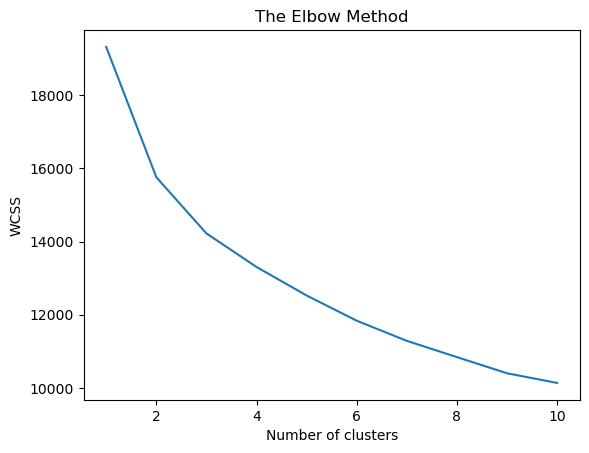

In [302]:
wcss = []
for i in range(1, 11):
    model = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    model.fit(X_scaled)
    wcss.append(model.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## 6-Instantiate the KMeans Object k=4:

In [303]:
model_3 = kmeans = KMeans(n_clusters=4,random_state=0)

In [305]:
model_3.fit(X_scaled)

C:\Users\wafas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\wafas\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [306]:

labels = model_3.labels_
print(labels)

[1 1 1 ... 0 0 3]


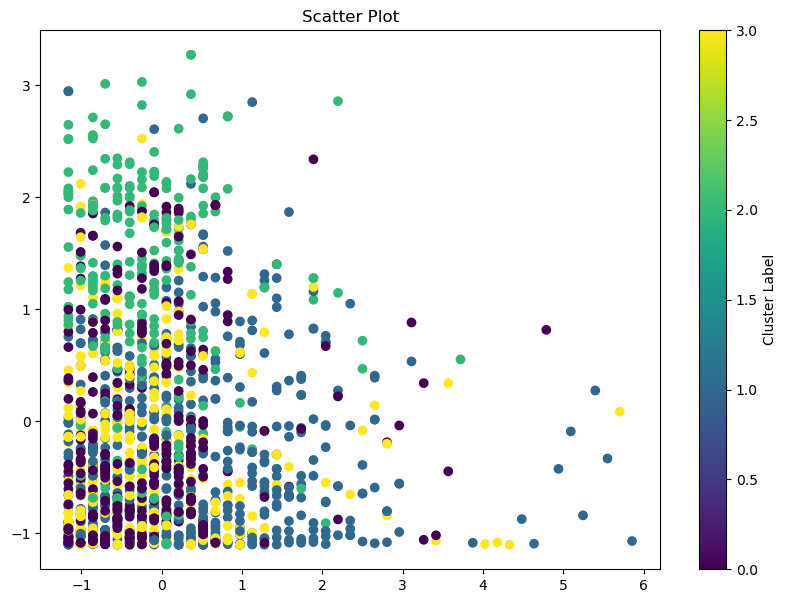

In [307]:
plt.figure(figsize=(10, 7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=model_3.labels_)
plt.title('Scatter Plot')

plt.colorbar(label='Cluster Label')
plt.show()